In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# In this case we need to define the matter density
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc.
# We will pass in a `Quantity` object with the units specified.

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

In [5]:
import numpy as np

zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

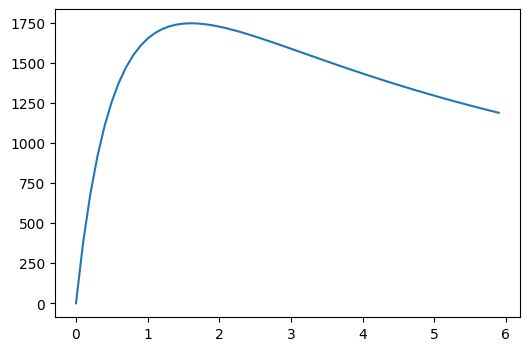

In [11]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)

In [12]:
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1]) * u.Gyr

In [13]:
from astropy.cosmology import z_at_value

ageticks = [z_at_value(cosmo.age, age) for age in ages]

[Text(0.0342654242473069, 1, '13'),
 Text(0.30529969870539053, 1, '10'),
 Text(0.5622761997285901, 1, '8'),
 Text(0.9394313081990152, 1, '6'),
 Text(1.2114538180402321, 1, '5'),
 Text(1.586736130025453, 1, '4'),
 Text(2.1532112700013326, 1, '3'),
 Text(3.150381753523928, 1, '2'),
 Text(4.035713900198318, 1, '1.5'),
 Text(4.84767084618423, 1, '1.2'),
 Text(5.606047443188419, 1, '1')]

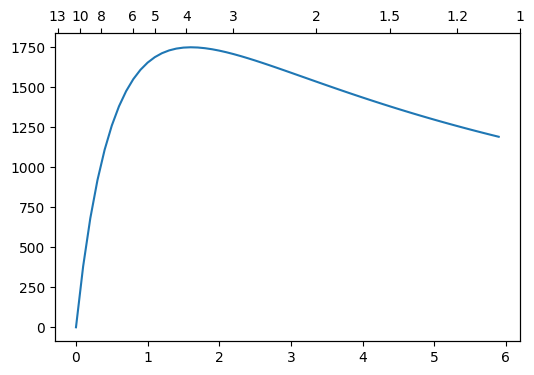

In [15]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(["{:g}".format(age) for age in ages.value])

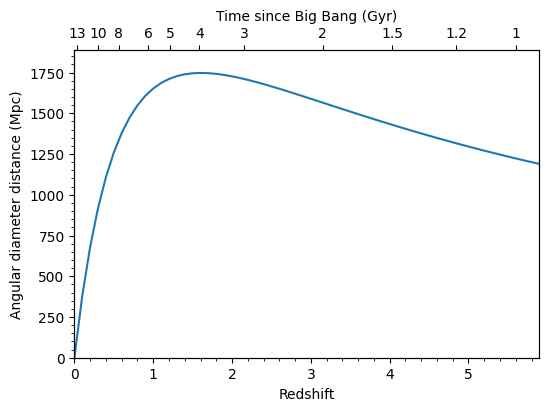

In [17]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(["{:g}".format(age) for age in ages.value])
zmin, zmax = 0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel("Time since Big Bang (Gyr)")
ax.set_xlabel("Redshift")
ax.set_ylabel("Angular diameter distance (Mpc)")
ax.set_ylim(0, 1890)
ax.minorticks_on()

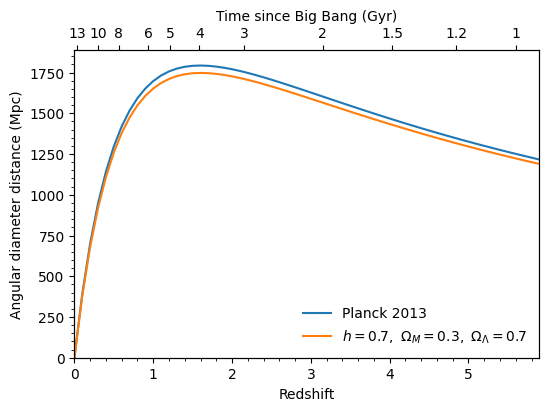

In [19]:
from astropy.cosmology import Planck13

dist2 = Planck13.angular_diameter_distance(zvals)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label="Planck 2013")
ax.plot(zvals, dist, label="$h=0.7,\\ \\Omega_M=0.3,\\ \\Omega_\\Lambda=0.7$")
ax.legend(frameon=0, loc="lower right")
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(["{:g}".format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel("Time since Big Bang (Gyr)")
ax.set_xlabel("Redshift")
ax.set_ylabel("Angular diameter distance (Mpc)")
ax.minorticks_on()
ax.set_ylim(0, 1890)
fig.savefig("ang_dist.png", dpi=200, bbox_inches="tight")